<a href="https://colab.research.google.com/github/ahalya439/Resturant-Managaement-System/blob/main/Backend_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pickle

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/gold kaagle data set.csv')

In [ ]:
df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [ ]:
df.shape

(10570, 10)

In [ ]:
df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


In [ ]:
df.isnull().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [ ]:
print(df.dtypes)

Dates                       object
URL                         object
News                        object
Price Direction Up           int64
Price Direction Constant     int64
Price Direction Down         int64
Asset Comparision            int64
Past Information             int64
Future Information           int64
Price Sentiment             object
dtype: object


2    6380
1    3814
3     376
Name: Price Sentiment, dtype: int64

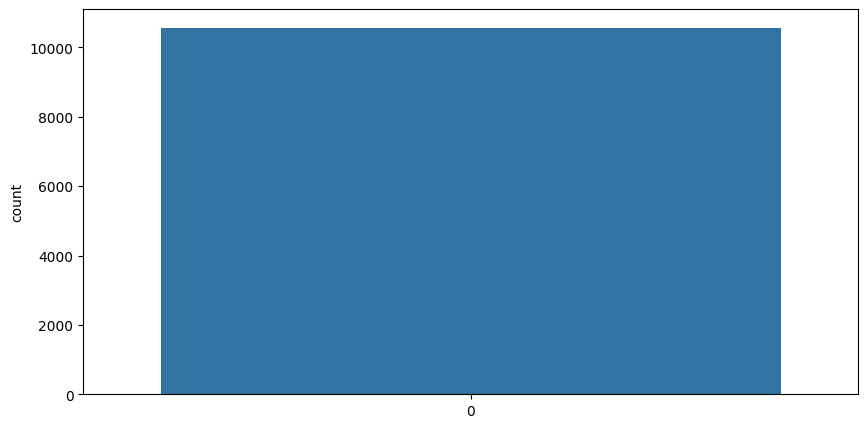

In [ ]:
plt.figure(figsize=(10,5)) 
sns.countplot(df['Price Sentiment'])
df['Price Sentiment'].value_counts()

Text(0, 0.5, 'Count')

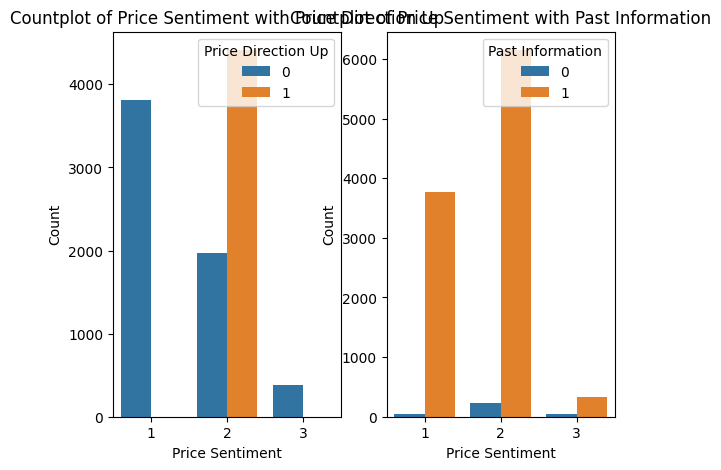

In [ ]:
plt.figure(figsize=(10,5)) 
plt.subplot(131)
sns.countplot(data=df, x='Price Sentiment', hue='Price Direction Up')
plt.title('Countplot of Price Sentiment with Price Direction Up')
plt.xlabel('Price Sentiment')
plt.ylabel('Count')

# Plot countplot for Price Sentiment with Past Information as hue
plt.subplot(132)
sns.countplot(data=df, x='Price Sentiment', hue='Past Information')
plt.title('Countplot of Price Sentiment with Past Information')
plt.xlabel('Price Sentiment')
plt.ylabel('Count')

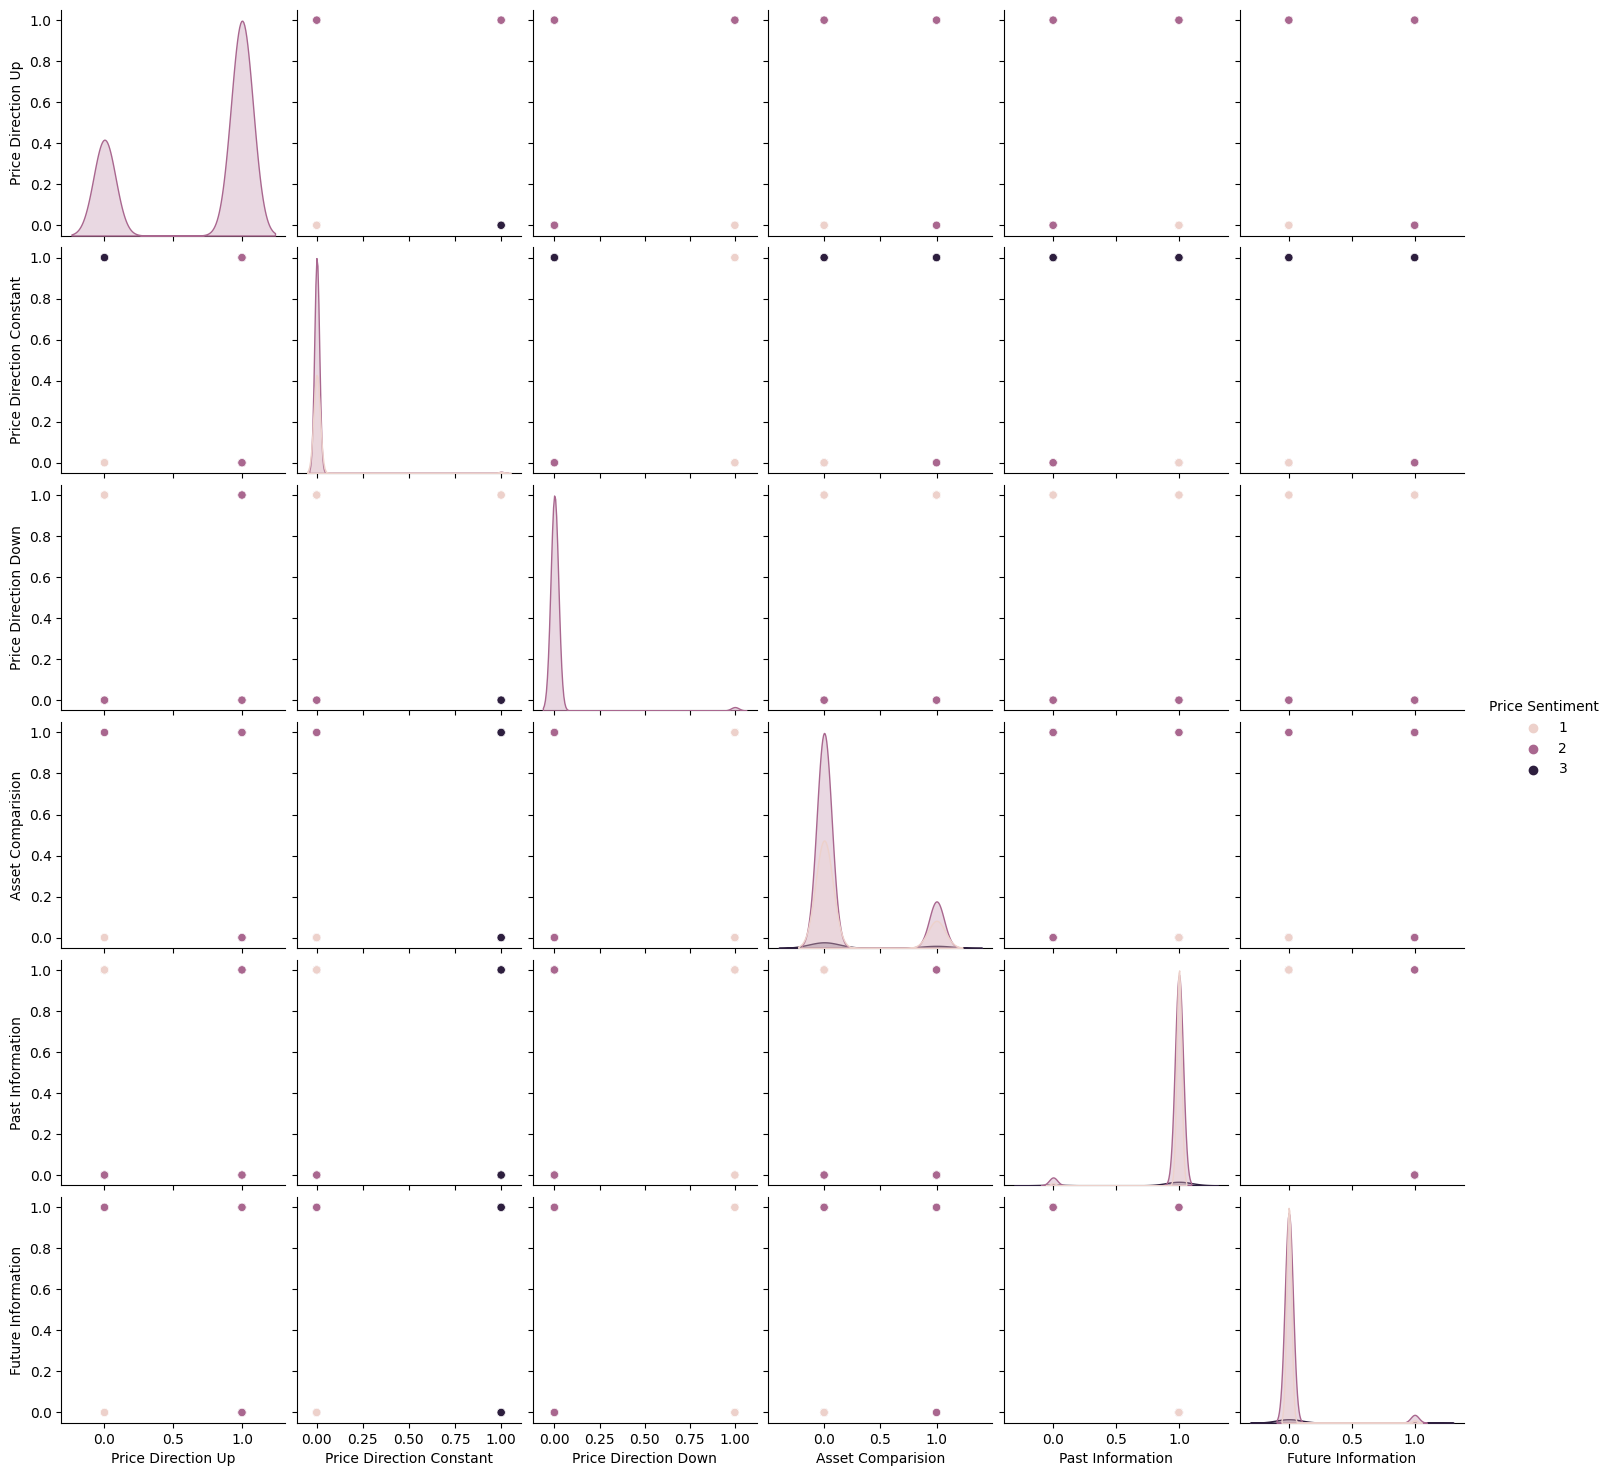

In [ ]:
sns.pairplot(df, hue='Price Sentiment')
plt.show()

Perform descriptive statistics on the dataset.

In [ ]:
df.describe()

,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
count,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.00000,10570.000000
mean,0.417408,0.042006,0.370104,0.189309,0.969915,0.03018,1.674740
std,0.493155,0.200612,0.482855,0.391773,0.170830,0.17109,0.539109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,2.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000


<ipython-input-63-43bc1bfd403f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price Direction Up'],color='green')


<Axes: xlabel='Price Direction Up', ylabel='Density'>

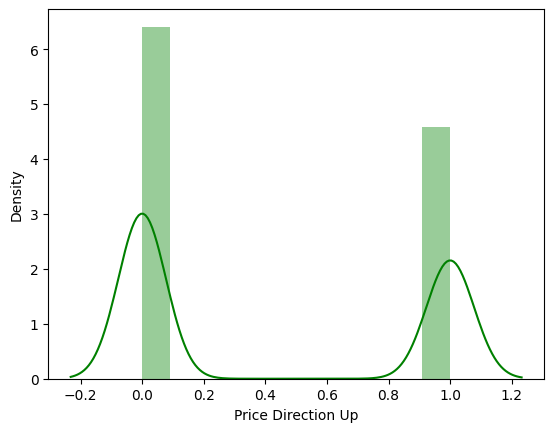

In [ ]:
sns.distplot(df['Price Direction Up'],color='green')

drop unwanted values

In [ ]:
unwanted_features = ['News']  # List the names of unwanted features here
df.drop(unwanted_features, axis=1, inplace=True)

# Verify the updated DataFrame
print(df.head())

   Price Direction Up  Price Direction Constant  Price Direction Down  \
0                   0                         0                     1   
1                   0                         0                     1   
2                   1                         0                     0   
3                   0                         0                     0   
4                   0                         0                     1   

   Asset Comparision  Past Information  Future Information  Price Sentiment  
0                  0                 1                   0                1  
1                  0                 1                   0                1  
2                  0                 1                   0                2  
3                  0                 0                   1                2  
4                  0                 1                   0                1  


In [ ]:
df

,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,0,0,1,0,1,0,1
1,0,0,1,0,1,0,1
2,1,0,0,0,1,0,2
3,0,0,0,0,0,1,2
4,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...
10565,0,0,1,0,1,0,1
10566,1,0,0,0,0,1,2
10567,0,0,1,0,1,0,1
10568,1,0,0,0,1,0,2


outliers

In [ ]:
df

,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,0,0,1,0,1,0,1
1,0,0,1,0,1,0,1
2,1,0,0,0,1,0,2
3,0,0,0,0,0,1,2
4,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...
10565,0,0,1,0,1,0,1
10566,1,0,0,0,0,1,2
10567,0,0,1,0,1,0,1
10568,1,0,0,0,1,0,2


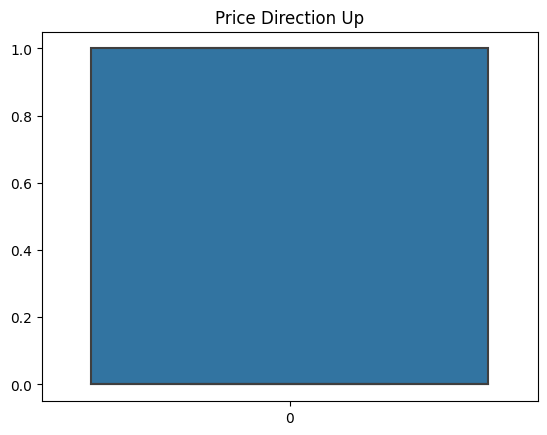

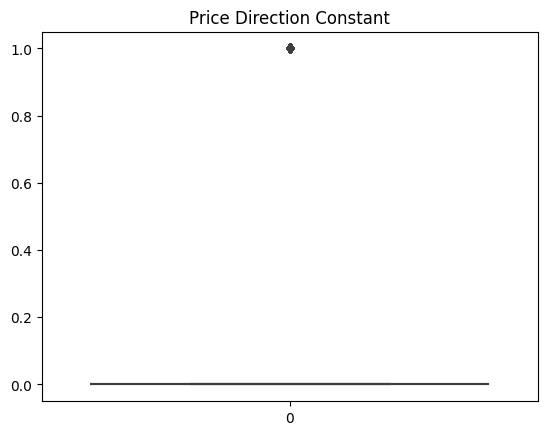

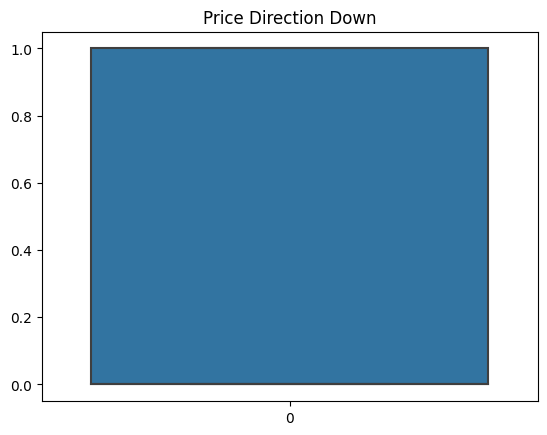

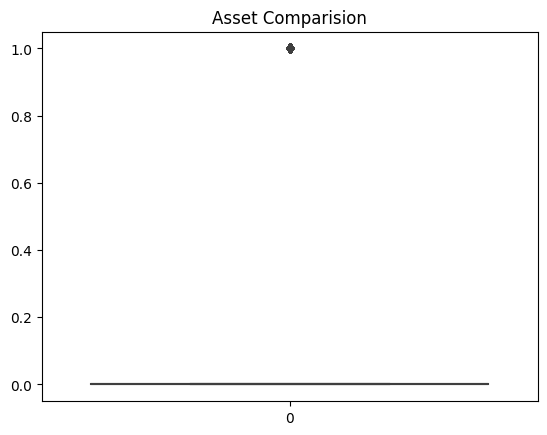

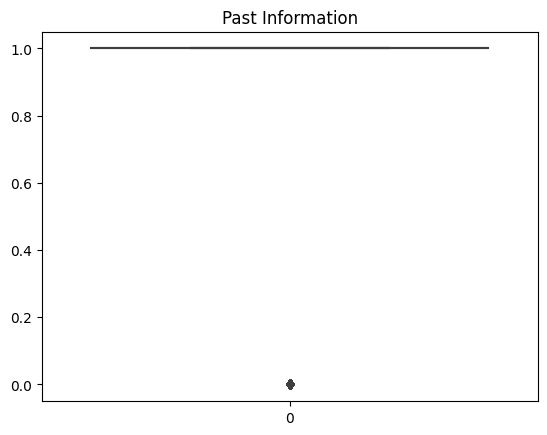

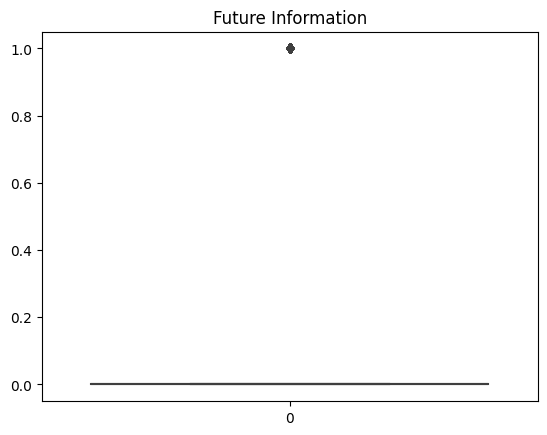

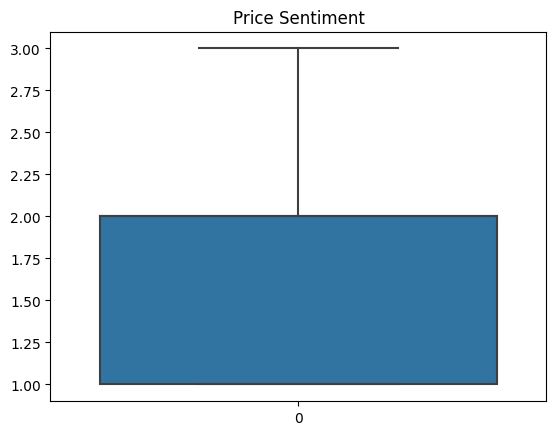

In [ ]:
for col in df.columns:
    if df[col].dtype in [int, float]:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

Missing values

In [ ]:
df.shape

(10570, 8)

In [ ]:
df.isnull().sum()

News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [ ]:
df['Price Sentiment'].value_counts()

2    6380
1    3814
3     376
Name: Price Sentiment, dtype: int64

In [ ]:
df['Price Sentiment'].unique()

array(['negative', 'positive', 'none', 'neutral'], dtype=object)

In [ ]:
df['Price Sentiment']=df['Price Sentiment'].map({'negative':1,'positive':2,'neutral':3,'none':2})

Handling Imbalancing Data

2    6380
1    3814
3     376
Name: Price Sentiment, dtype: int64

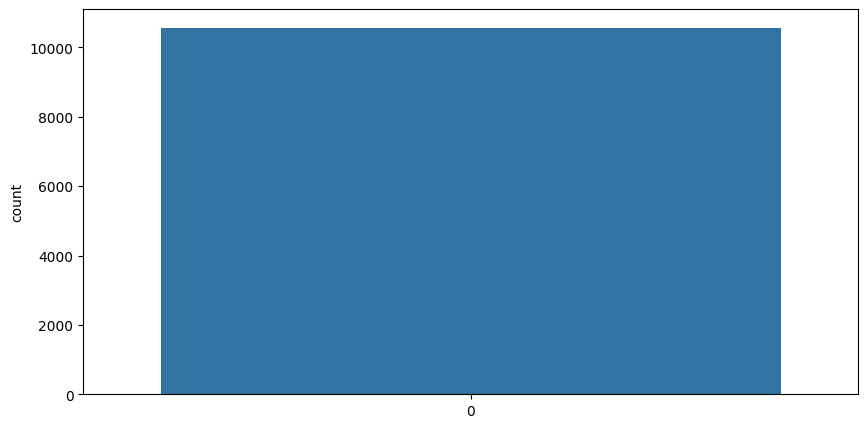

In [ ]:
plt.figure(figsize=(10,5)) 
sns.countplot(df['Price Sentiment'])
df['Price Sentiment'].value_counts()

In [ ]:
Text pre-preprocessing

In [202]:
import re

import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation 
def text_clean_1(text):
 text = text.lower() #converts to Lower-case 
 text = re.sub('\[.*?\]', '', text) #it will remove .,,", []
 text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
 text = re.sub("\w*\d\w*", '', text) 
 text = re.sub('[''""...]','', text) 
 text = re.sub('\n','', text)
 return text

Cleaned_News=lambda x: text_clean_1(x)

Split the data into dependent and independent variables.

In [ ]:

df.head()

,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,0,0,1,0,1,0,1
1,0,0,1,0,1,0,1
2,1,0,0,0,1,0,2
3,0,0,0,0,0,1,2
4,0,0,1,0,1,0,1


In [ ]:
x = df.drop('Price Direction Up', axis=1)
y = df['Price Direction Up']

In [ ]:
x.head()

,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,0,1,0,1,0,1
1,0,1,0,1,0,1
2,0,0,0,1,0,2
3,0,0,0,0,1,2
4,0,1,0,1,0,1


In [ ]:
print(df.dtypes)

Price Direction Up          int64
Price Direction Constant    int64
Price Direction Down        int64
Asset Comparision           int64
Past Information            int64
Future Information          int64
Price Sentiment             int64
dtype: object


Using labelencoding from scikit-learn.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype in [object]:
         df[col] = label_encoder.fit_transform(df[col])

In [ ]:
print(df.dtypes)

News                        int64
Price Direction Up          int64
Price Direction Constant    int64
Price Direction Down        int64
Asset Comparision           int64
Past Information            int64
Future Information          int64
Price Sentiment             int64
dtype: object


Scaling the data.

In [169]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
columns_to_scale = ['Price Direction Up','Price Direction Down','Price Direction Constant','Price Sentiment']
data_to_scale = df[columns_to_scale]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
min_max_scaler = MinMaxScaler()
scaled_data_minmax = min_max_scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=columns_to_scale)

In [170]:
scaled_data

array([[-0.84644337,  1.30458528, -0.209398  , -1.25164312],
       [-0.84644337,  1.30458528, -0.209398  , -1.25164312],
       [ 1.18141394, -0.76652712, -0.209398  ,  0.60335797],
       ...,
       [-0.84644337,  1.30458528, -0.209398  , -1.25164312],
       [ 1.18141394, -0.76652712, -0.209398  ,  0.60335797],
       [-0.84644337,  1.30458528, -0.209398  , -1.25164312]])

In [171]:
scaled_data_minmax

array([[0. , 1. , 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [1. , 0. , 0. , 0.5],
       ...,
       [0. , 1. , 0. , 0. ],
       [1. , 0. , 0. , 0.5],
       [0. , 1. , 0. , 0. ]])

In [172]:
scaled_df

,Price Direction Up,Price Direction Down,Price Direction Constant,Price Sentiment
0,-0.846443,1.304585,-0.209398,-1.251643
1,-0.846443,1.304585,-0.209398,-1.251643
2,1.181414,-0.766527,-0.209398,0.603358
3,-0.846443,-0.766527,-0.209398,0.603358
4,-0.846443,1.304585,-0.209398,-1.251643
...,...,...,...,...
10565,-0.846443,1.304585,-0.209398,-1.251643
10566,1.181414,-0.766527,-0.209398,0.603358
10567,-0.846443,1.304585,-0.209398,-1.251643
10568,1.181414,-0.766527,-0.209398,0.603358


In [173]:
scaled_df_minmax

,Price Direction Up,Price Direction Down,Price Direction Constant,Price Sentiment
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.5
3,0.0,0.0,0.0,0.5
4,0.0,1.0,0.0,0.0
...,...,...,...,...
10565,0.0,1.0,0.0,0.0
10566,1.0,0.0,0.0,0.5
10567,0.0,1.0,0.0,0.0
10568,1.0,0.0,0.0,0.5


In [174]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Price Direction Up, dtype: int64

Split the data into training and testing.

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train:",len(x_train))

print("x_test:", len(x_test))

print("y_train:",len(y_train))

print("y_test:", len(y_test))



x_train: 8456
x_test: 2114
y_train: 8456
y_test: 2114


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8456, 7) (2114, 7) (8456,) (2114,)


Build the Model.

In [136]:
from sklearn.feature_extraction. text import TfidfVectorizer

from sklearn. linear_model import LogisticRegression

tvec = TfidfVectorizer()

clf2 =LogisticRegression()

In [ ]:
Model Building with Logistic regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
y_pred = model.predict(x_test)

In [139]:
model = LogisticRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

LogisticRegression()

In [151]:
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8084200567644276


In [ ]:
Model Building with svm

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [167]:
print(x_train.shape)
print(y_train.shape)

(6, 10)
(8456,)


In [181]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of the SVM model
model = SVC()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8202459791863765


In [191]:
regressor=RandomForestRegressor(n_estimators=100)

In [192]:
#Training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [193]:
#prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [194]:
print(test_data_prediction)

[0.         0.69840968 0.69840968 ... 0.69840968 0.         0.69840968]


In [195]:
#R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.4848916222164017


Compare the Actual Values and Prediced Values

In [196]:
Y_test = list(y_test)

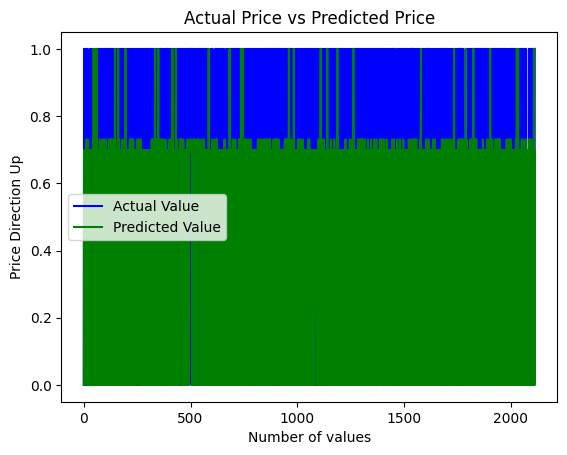

In [201]:
plt.plot(Y_test, color='blue', label ='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Price Direction Up')
plt.legend()
plt.show()

In [216]:
import pickle

with open('goldnewsanalysis.pkl', 'wb') as file:
    pickle.dump(model, file)